In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
import pandas
from time import time

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *
from LazyLuna.network_comparison_utils import *

In [2]:
# basepaths
bp       = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases'
bp_annos = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Preds/MRUNet'
bp_cases = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Cases'
bp_imgs  = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs'

In [ ]:
"""
imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)

cases = []
sax_cs_view   = SAX_CS_View()
for imgp, annop in imgsanno_paths:
    print(imgp, annop)
    st = time()
    case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
    case = sax_cs_view.customize_case(case)
    case.store(bp_cases)
    cases.append(case)
    print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
"""

In [17]:
case_paths = [p for p in os.listdir(bp_cases) if 'Annos' in p and p.endswith('.pickle')]
cases1 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)
case_paths = [p for p in os.listdir(bp_cases) if 'FCN' in p and p.endswith('.pickle')]
cases2 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)
case_paths = [p for p in os.listdir(bp_cases) if 'MRUNet' in p and p.endswith('.pickle')]
cases3 = sorted([pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in case_paths], key=lambda c:c.case_name)

In [60]:
# get table of CRs, CR means and stdevs & wilcoxon test result diffs
df, stats, wilcox_tests = clinical_result_pandas_table(cases1, cases2, with_dices=True)
display(df)
print(stats['LVESV difference'])
print('Mean: ', stats['LVESV difference'].mean())
print(wilcox_tests['RVESV difference'])
pandas.DataFrame.to_csv(df, '/Users/dietrichhadler/Desktop/test_table.csv')

/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,case,reader1,reader2,LVESV Annos,LVESV FCN,LVESV difference,LVEDV Annos,LVEDV FCN,LVEDV difference,RVESV Annos,...,LVEDP difference,case,avg dice,avg dice cont by both,lv_endo avg dice,lv_endo avg dice cont by both,lv_myo avg dice,lv_myo avg dice cont by both,rv_endo avg dice,rv_endo avg dice cont by both
row_00000,ECSPRESS-003,Annos,FCN,44.669443,47.482644,-2.813201,142.076853,143.149878,-1.073025,78.063904,...,0,ECSPRESS-003,88.922534,87.302400,95.118553,93.208421,90.841538,87.257791,80.807510,81.174561
row_00001,ECSPRESS-012,Annos,FCN,78.548260,79.056786,-0.508526,157.611798,157.845671,-0.233873,76.381420,...,0,ECSPRESS-012,86.055420,89.294498,89.446119,94.261493,85.083069,84.906328,83.637072,88.819315
row_00002,ECSPRESS-056,Annos,FCN,135.394122,128.986198,6.407924,244.766395,237.912382,6.854013,86.953921,...,0,ECSPRESS-056,89.724894,90.872383,93.861737,95.470794,86.028031,84.373045,89.284914,92.855960


count    3.000000
mean     1.028732
std      4.798923
min     -2.813201
25%     -1.660864
50%     -0.508526
75%      2.949699
max      6.407924
Name: LVESV difference, dtype: float64
Mean:  1.6503360200900885
WilcoxonResult(statistic=0.0, pvalue=0.25)


In [36]:
# get table of CRs, CR means and stdevs & wilcoxon test result diffs
df1, _,_ = clinical_result_pandas_table(cases1, cases2, with_dices=True)
df2, _,_ = clinical_result_pandas_table(cases1, cases3, with_dices=True)

display(df1)
display(df2)

/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,case,reader1,reader2,LVESV Annos,LVESV FCN,LVESV difference,LVEDV Annos,LVEDV FCN,LVEDV difference,RVESV Annos,...,LVEDP difference,case,avg dice,avg dice cont by both,lv_endo avg dice,lv_endo avg dice cont by both,lv_myo avg dice,lv_myo avg dice cont by both,rv_endo avg dice,rv_endo avg dice cont by both
row_00000,ECSPRESS-003,Annos,FCN,44.669443,47.482644,-2.813201,142.076853,143.149878,-1.073025,78.063904,...,0,ECSPRESS-003,88.922534,87.302400,95.118553,93.208421,90.841538,87.257791,80.807510,81.174561
row_00001,ECSPRESS-012,Annos,FCN,78.548260,79.056786,-0.508526,157.611798,157.845671,-0.233873,76.381420,...,0,ECSPRESS-012,86.055420,89.294498,89.446119,94.261493,85.083069,84.906328,83.637072,88.819315
row_00002,ECSPRESS-056,Annos,FCN,135.394122,128.986198,6.407924,244.766395,237.912382,6.854013,86.953921,...,0,ECSPRESS-056,89.724894,90.872383,93.861737,95.470794,86.028031,84.373045,89.284914,92.855960


,case,reader1,reader2,LVESV Annos,LVESV MRUNet,LVESV difference,LVEDV Annos,LVEDV MRUNet,LVEDV difference,RVESV Annos,...,LVEDP difference,case,avg dice,avg dice cont by both,lv_endo avg dice,lv_endo avg dice cont by both,lv_myo avg dice,lv_myo avg dice cont by both,rv_endo avg dice,rv_endo avg dice cont by both
row_00000,ECSPRESS-003,Annos,MRUNet,44.669443,43.621950,1.047494,142.076853,137.690309,4.386544,78.063904,...,0,ECSPRESS-003,86.218761,84.500016,92.412540,93.509149,86.887194,85.472282,79.356549,74.518617
row_00001,ECSPRESS-012,Annos,MRUNet,78.548260,70.941972,7.606288,157.611798,149.549376,8.062422,76.381420,...,0,ECSPRESS-012,84.281635,85.586242,89.942674,91.126623,82.853123,82.051998,80.049107,83.078571
row_00002,ECSPRESS-056,Annos,MRUNet,135.394122,124.228574,11.165548,244.766395,238.458339,6.308056,86.953921,...,0,ECSPRESS-056,90.520889,89.199024,96.433199,94.947032,87.407220,82.160229,87.722247,90.545931


In [54]:
df1.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
print(len(df1))
print(len(df2))
df_full = pandas.DataFrame(np.concatenate([df1,df2], axis=0),columns=df1.columns)
print(len(df_full))
print(df_full)

3
3
6
           case reader1 reader2 LVESV Annos   LVESV FCN LVESV difference  \
0  ECSPRESS-003   Annos     FCN   44.669443   47.482644        -2.813201   
1  ECSPRESS-012   Annos     FCN    78.54826   79.056786        -0.508526   
2  ECSPRESS-056   Annos     FCN  135.394122  128.986198         6.407924   
3  ECSPRESS-003   Annos  MRUNet   44.669443    43.62195         1.047494   
4  ECSPRESS-012   Annos  MRUNet    78.54826   70.941972         7.606288   
5  ECSPRESS-056   Annos  MRUNet  135.394122  124.228574        11.165548   

  LVEDV Annos   LVEDV FCN LVEDV difference RVESV Annos  ... LVEDP difference  \
0  142.076853  143.149878        -1.073025   78.063904  ...                0   
1  157.611798  157.845671        -0.233873    76.38142  ...                0   
2  244.766395  237.912382         6.854013   86.953921  ...                0   
3  142.076853  137.690309         4.386544   78.063904  ...                0   
4  157.611798  149.549376         8.062422    76.38142  ...  

0


/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


1
           case reader1 reader2 LVESV Annos LVESV MRUNet LVESV difference  \
0  ECSPRESS-003   Annos     FCN   44.669443    47.482644        -2.813201   
1  ECSPRESS-012   Annos     FCN    78.54826    79.056786        -0.508526   
2  ECSPRESS-056   Annos     FCN  135.394122   128.986198         6.407924   
3  ECSPRESS-003   Annos  MRUNet   44.669443     43.62195         1.047494   
4  ECSPRESS-012   Annos  MRUNet    78.54826    70.941972         7.606288   
5  ECSPRESS-056   Annos  MRUNet  135.394122   124.228574        11.165548   

  LVEDV Annos LVEDV MRUNet LVEDV difference RVESV Annos  ... LVEDP difference  \
0  142.076853   143.149878        -1.073025   78.063904  ...                0   
1  157.611798   157.845671        -0.233873    76.38142  ...                0   
2  244.766395   237.912382         6.854013   86.953921  ...                0   
3  142.076853   137.690309         4.386544   78.063904  ...                0   
4  157.611798   149.549376         8.062422    76.381

           case reader1 reader2 LVESV Annos LVESV MRUNet LVESV difference  \
0  ECSPRESS-003   Annos     FCN   44.669443    47.482644        -2.813201   
1  ECSPRESS-012   Annos     FCN    78.54826    79.056786        -0.508526   
2  ECSPRESS-056   Annos     FCN  135.394122   128.986198         6.407924   
3  ECSPRESS-003   Annos  MRUNet   44.669443     43.62195         1.047494   
4  ECSPRESS-012   Annos  MRUNet    78.54826    70.941972         7.606288   
5  ECSPRESS-056   Annos  MRUNet  135.394122   124.228574        11.165548   

  LVEDV Annos LVEDV MRUNet LVEDV difference RVESV Annos  ... LVEDP difference  \
0  142.076853   143.149878        -1.073025   78.063904  ...                0   
1  157.611798   157.845671        -0.233873    76.38142  ...                0   
2  244.766395   237.912382         6.854013   86.953921  ...                0   
3  142.076853   137.690309         4.386544   78.063904  ...                0   
4  157.611798   149.549376         8.062422    76.38142

NameError: name 'dice_data' is not defined

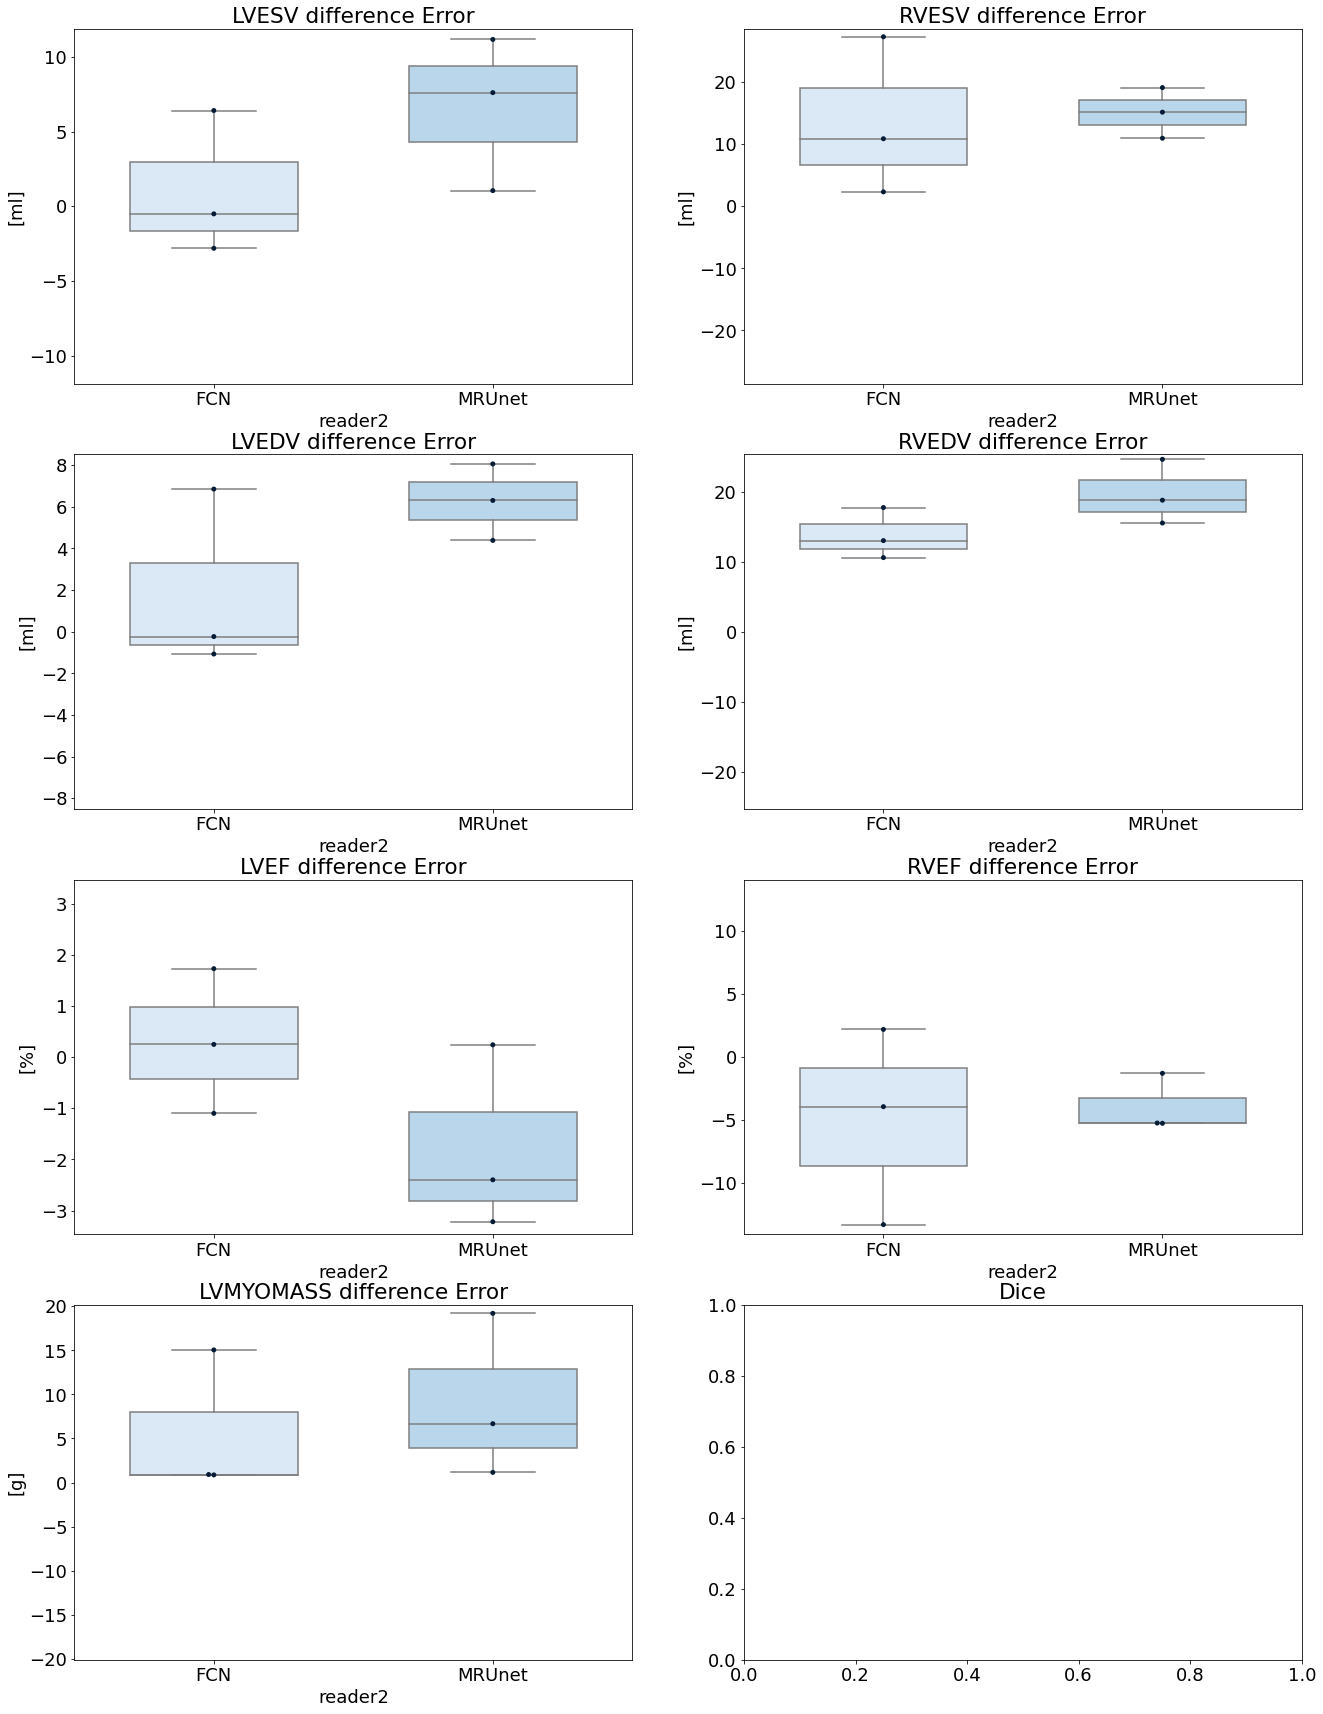

In [61]:
def SAX_candlelight_plot(gs_cases, name2cases):
    columns, rows    = 2, 4
    boxplot_palette  = sb.color_palette("Blues")
    boxplot_palette2 = sb.color_palette("Purples")
    swarm_palette = sb.color_palette(["#061C36", "#061C36"])
    plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 18})
    fig, axes = plt.subplots(rows, columns, figsize=(columns*11,(rows*7.5)))
    
    name2tables = dict()
    tables = []
    for n_i, n in enumerate(name2cases.keys()): 
        print(n_i)
        df, stats, wilcox_tests = clinical_result_pandas_table(gs_cases, name2cases[n], with_dices=True)
        tables.append(df)
    table = pandas.DataFrame(np.concatenate(tables, axis=0),columns=df.columns)
    #table = pandas.concat([t for t in tables])
    
    j = 0
    crvs = ['LVESV', 'LVEDV', 'LVEF', 'LVMYOMASS', 'RVESV', 'RVEDV', 'RVEF']
    crvs = [crv+' difference' for crv in crvs]
    for i, crv in enumerate(crvs):
        if i >= (rows*columns): continue
        while i >= rows: i-=rows
        axes[i][j].set_title(crv + " Error")
        print(table)
        #sb.boxplot   (ax=axes[i][j], data=crvs_data[crv], palette=boxplot_palette, saturation=1, width=0.6)
        sb.boxplot(ax=axes[i][j], data=table, x='reader2', y=crv, palette=boxplot_palette, saturation=1, width=0.6)
        #sb.swarmplot (ax=axes[i][j], data=crvs_data[crv], color="#061C36", alpha=1)
        sb.swarmplot (ax=axes[i][j], data=table, x='reader2', y=crv, color="#061C36", alpha=1)        
        axes[i][j].set_xticklabels(list(name2cases.keys()))
        axes[i][j].set_ylabel('[%]' if 'EF' in crv else '[ml]' if 'ESV' in crv or 'EDV' in crv else '[g]' )
        yabs_max = abs(max(axes[i][j].get_ylim(), key=abs))
        axes[i][j].set_ylim(ymin=-yabs_max, ymax=yabs_max)
        if i == (rows-1): j+=1

    ax = axes[3][1]
    ax.set_title('Dice')
    dicebp = sb.boxplot   (ax=ax, x="NetName", y="Dice", data=dice_data, hue="Segmented by both", width=0.8)
    sb.swarmplot (ax=ax, x="NetName", y="Dice", data=dice_data, hue="Segmented by both", palette=swarm_palette, dodge=True)
    handles, labels = ax.get_legend_handles_labels()
    handles[0].set_fc(boxplot_palette[3])
    handles[1].set_fc(boxplot_palette2[3])
    ax.legend(handles[:2], labels[:2], title="Segmented by both")
    ax.set_ylabel('[%]')
    ax.set_xlabel("")
    ax.set_ylim(ymin=70, ymax=95)

    for i, boxplot in enumerate(dicebp.artists):
        if i%2 == 0: boxplot.set_facecolor(boxplot_palette[i//2])
        else:        boxplot.set_facecolor(boxplot_palette2[i//2])

    sb.despine()
    plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.25, hspace=0.35)
    fig.savefig("candlelight_test.png", dpi=100, facecolor="#FFFFFF")
    
SAX_candlelight_plot(cases1, {'FCN':cases2, 'MRUnet':cases3})

In [ ]:
# Just showing some images
for c1,c2 in zip(cases1, cases2):
    print(c1.case_name, c2.case_name)
    lves1, lved1 = [c for c in c1.categories if 'ES' in c.name][0], [c for c in c1.categories if 'ED' in c.name][0]
    cat2 = [c for c in c2.categories][0]
    esp, edp = lves1.phase, lved1.phase
    for d in range(lves1.nr_slices):
        for p in [esp, edp]:
            print('Slice: ', d, ',  Phase: ', p)
            img1, anno1 = lves1.get_img(d, p), lves1.get_anno(d, p)
            img2, anno2 = cat2 .get_img(d, p), cat2 .get_anno(d, p)
            fig, axes = plt.subplots(1,5, figsize=(20,10))
            for i in range(5): axes[i].imshow(img1); axes[i].axis('off')
            anno1.plot_all_contour_outlines(axes[0])
            anno2.plot_all_contour_outlines(axes[1])
            anno1.plot_cont_comparison(axes[2], anno2, 'lv_endo')
            anno1.plot_cont_comparison(axes[3], anno2, 'lv_myo' )
            anno1.plot_cont_comparison(axes[4], anno2, 'rv_endo')
            fig.tight_layout()
            plt.show()